# Exploration

In [1]:
from svglib.svglib import svg2rlg

drawing = svg2rlg("/Users/v/Desktop/Retail - recreation.svg")

In [2]:
type(drawing.getContents()[0].getContents()[0].getContents()[1].getContents()[0])

reportlab.graphics.shapes.Path

In [21]:
path = drawing.getContents()[0].getContents()[0].getContents()[1].getContents()[0]
#path.points

In [26]:
line = drawing.getContents()[0].getContents()[0].getContents()[0]
line.__dict__.keys()

dict_keys(['strokeColor', 'strokeWidth', 'strokeLineCap', 'strokeLineJoin', 'strokeMiterLimit', 'strokeDashArray', 'strokeOpacity', 'x1', 'y1', 'x2', 'y2', '_fillRule'])

In [53]:
shapes = line.getContents()

In [98]:
lines[0].getBounds()

(91.29, 308.2, 91.29, 311.63)

In [35]:
from collections.abc import Iterable
from reportlab.graphics.shapes import (
    _CLOSEPATH, Circle, Drawing, Ellipse, Group, Image, Line, Path, PolyLine,
    Polygon, Rect, SolidShape, String,
)

paths = []
lines = []
polilines = []
def explore_tree(branch, prefix = ''):
    global paths, lines
    if type(branch) == Path:
        paths.append(branch)
    elif type(branch) == Line:
        lines.append(branch)
    elif type(branch) == PolyLine:
        polilines.append(branch)
    print(f'{prefix}{branch}')
    try:
        for i, sub_branch in enumerate(branch.getContents()):
            sub_prefix = f'{prefix}[{i}]'
            explore_tree(sub_branch, sub_prefix)
    except:
        pass
    
    
        
explore_tree(drawing)
paths, lines, polilines

[0]<reportlab.graphics.shapes.Group object at 0x10f231b50>
[0][0]<reportlab.graphics.shapes.Group object at 0x10ff0c040>
[0][0][0]<reportlab.graphics.shapes.Line object at 0x10ff0c700>
[0][0][1]<reportlab.graphics.shapes.Group object at 0x10feffc40>
[0][0][1][0]<reportlab.graphics.shapes.Path object at 0x10ff0c730>
[0][0][2]<reportlab.graphics.shapes.Line object at 0x10ff0cb80>
[0][0][3]<reportlab.graphics.shapes.Group object at 0x10ff0cd00>
[0][0][3][0]<reportlab.graphics.shapes.Path object at 0x10ff0cc40>
[0][0][4]<reportlab.graphics.shapes.Group object at 0x10ff0cb20>
[0][0][4][0]<reportlab.graphics.shapes.Path object at 0x10ff0cd60>
[0][0][5]<reportlab.graphics.shapes.Line object at 0x10ff0ce80>
[0][0][6]<reportlab.graphics.shapes.Group object at 0x10ff0c220>
[0][0][6][0]<reportlab.graphics.shapes.Path object at 0x10ff0cfa0>
[0][0][7]<reportlab.graphics.shapes.Line object at 0x10ff0ca30>
[0][0][8]<reportlab.graphics.shapes.Line object at 0x10ff0c970>
[0][0][9]<reportlab.graphics.sh

([<reportlab.graphics.shapes.Path at 0x10ff0c730>,
 [<reportlab.graphics.shapes.PolyLine at 0x10ff22e50>])

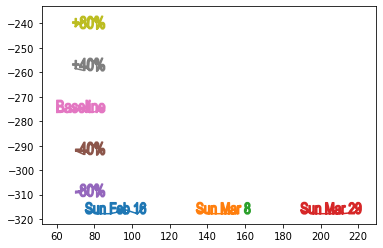

In [28]:
import matplotlib.pyplot as plt

def plot_path(path):
    x, y = [], []
    for i, value in enumerate(path.points):
        if i % 2 == 0:
            x.append(value)
        elif i % 2 == 1:
            y.append(value* -1)
            
    plt.plot(x, y)
    

for path in paths:
    plot_path(path)

lines[0].y1 = 308.2
lines[1].y1 = 308.2
lines[2].y1 = 308.2
lines[3].y1 = 308.2
lines[4].y1 = 308.2
lines[5].y1 = 308.2
lines[6].y1 = 308.2
lines[7].y1 = 308.2
lines[8].y1 = 308.2
lines[9].y1 = 308.2
lines[10].y1 = 291.06
lines[11].y1 = 273.91
lines[12].y1 = 256.76
lines[13].y1 = 239.61


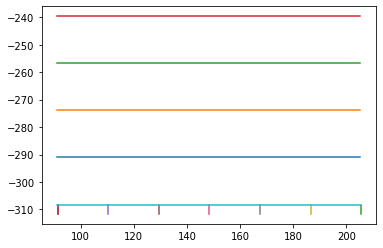

In [49]:
def plot_line(line):
    x, y = [line.x1, line.x2], [line.y1 * -1, line.y2 * -1]
    plt.plot(x, y)
    
for i, line in enumerate(lines):
    plot_line(line)
    print(f'lines[{i}].y1 = {line.y1}')

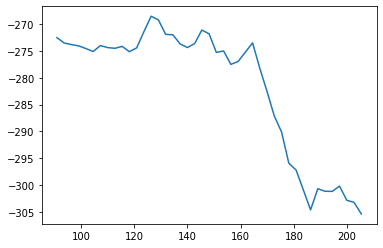

In [82]:
plot_path(polilines[0])

In [84]:
import datetime

start_date = datetime.date(2020, 2, 16)
end_date = datetime.date(2020, 3, 29)
delta_date = end_date - start_date
delta_date.days

42

In [93]:
seconds = 24 * 3600 // (284 / 42)

delta_steps = datetime.timedelta(seconds=seconds)

datetimes = []
current_date = datetime.datetime.combine(start_date, datetime.datetime.min.time())
for i in range(284):
    datetimes.append(current_date)
    current_date = current_date + delta_steps

In [92]:
len(datetimes)

285

In [77]:
from collections import namedtuple

Ref = namedtuple('Reference', ['rate', 'level'])

ref = Ref(-.4, -291.06)
ref

Reference(rate=-0.4, level=-291.06)

In [78]:
factor = ref.rate / ref.level

-291.06 * factor

-0.39999999999999997

In [79]:
(-273.91) - (-291.06)

17.149999999999977

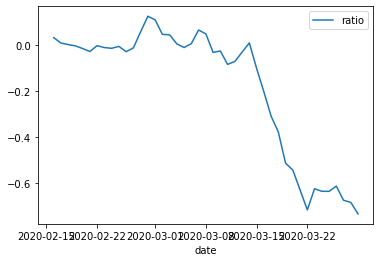

In [132]:
import pandas as pd

def poliline2df(poliline, baseline, ref, start_date = datetime.date(2020, 2, 16)):
    df = pd.DataFrame()
    factor = ref.rate / (ref.level - baseline)
    
    x, y = [], []
    for i, value in enumerate(poliline.points):
        if i % 2 == 0:
            x.append(start_date)
            start_date = start_date + datetime.timedelta(days=1)
        elif i % 2 == 1:
            y.append(((value * -1) - baseline) * factor)
            
    df['date'] = x
    df['ratio'] = y
    
    return df.set_index('date')

df = poliline2df(polilines[0], -273.91, ref)
#df.set_index('x')
df.plot()

In [133]:
df

,ratio
date,
2020-02-16,0.032653
2020-02-17,0.009096
2020-02-18,0.002332
2020-02-19,-0.003265
2020-02-20,-0.014927
2020-02-21,-0.027755
2020-02-22,-0.002099
2020-02-23,-0.010729
2020-02-24,-0.013761


# Systematization

In [1]:
# Load sgv files
from svglib.svglib import svg2rlg
import os

file_list = [file for file in os.scandir('data/figures') if file.name.split('.')[-1] == 'svg']
file_list
#drawing = svg2rlg("/Users/v/Desktop/Retail - recreation.svg")

[<DirEntry 'Residential.svg'>,
 <DirEntry 'Grocery & pharmacy.svg'>,
 <DirEntry 'Parks.svg'>,
 <DirEntry 'Retail - recreation.svg'>,
 <DirEntry 'Workplaces.svg'>,
 <DirEntry 'Transit stations.svg'>]

In [39]:
from reportlab.graphics.shapes import PolyLine, Line

def get_type(figure, type_ = PolyLine, check_one = True):
    def get_types(branch, types = []):
        if type(branch) == type_:
            types.append(branch)
        try:
            for sub_branch in branch.getContents():
                types = get_types(sub_branch, types)
        except:
            pass
        
        return types
    

    types = get_types(figure)
    
    if len(types) > 1:
        if check_one:
            print(f'Found more than one {str(type_)}, please check result')
        return types
    else:
        return types[0]

drawing = svg2rlg("/Users/v/Desktop/Retail - recreation.svg")
polyline = get_type(drawing, PolyLine, True)
polyline

## Just check that all images have the same reference frame

In [28]:
import matplotlib.pyplot as plt

def plot_line(line):
    x, y = [line.x1, line.x2], [line.y1 * -1, line.y2 * -1]
    plt.plot(x, y)

lines[0].y1 = 308.2
lines[1].y1 = 308.2
lines[2].y1 = 308.2
lines[3].y1 = 308.2
lines[4].y1 = 308.2
lines[5].y1 = 308.2
lines[6].y1 = 308.2
lines[7].y1 = 308.2
lines[8].y1 = 308.2
lines[9].y1 = 308.2
lines[10].y1 = 291.06
lines[11].y1 = 273.91
lines[12].y1 = 256.76
lines[13].y1 = 239.61


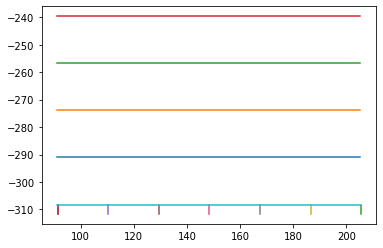

lines[0].y1 = 308.2
lines[1].y1 = 308.2
lines[2].y1 = 308.2
lines[3].y1 = 308.2
lines[4].y1 = 308.2
lines[5].y1 = 308.2
lines[6].y1 = 308.2
lines[7].y1 = 308.2
lines[8].y1 = 308.2
lines[9].y1 = 308.2
lines[10].y1 = 291.06
lines[11].y1 = 273.91
lines[12].y1 = 256.76
lines[13].y1 = 239.61


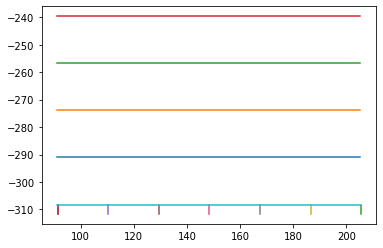

lines[0].y1 = 308.2
lines[1].y1 = 308.2
lines[2].y1 = 308.2
lines[3].y1 = 308.2
lines[4].y1 = 308.2
lines[5].y1 = 308.2
lines[6].y1 = 308.2
lines[7].y1 = 308.2
lines[8].y1 = 308.2
lines[9].y1 = 308.2
lines[10].y1 = 291.06
lines[11].y1 = 273.91
lines[12].y1 = 256.76
lines[13].y1 = 239.61


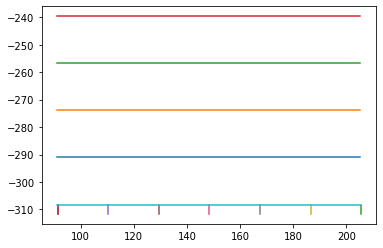

lines[0].y1 = 308.2
lines[1].y1 = 308.2
lines[2].y1 = 308.2
lines[3].y1 = 308.2
lines[4].y1 = 308.2
lines[5].y1 = 308.2
lines[6].y1 = 308.2
lines[7].y1 = 308.2
lines[8].y1 = 308.2
lines[9].y1 = 308.2
lines[10].y1 = 291.06
lines[11].y1 = 273.91
lines[12].y1 = 256.76
lines[13].y1 = 239.61


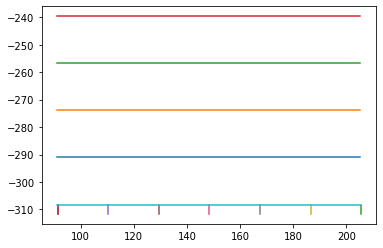

lines[0].y1 = 308.2
lines[1].y1 = 308.2
lines[2].y1 = 308.2
lines[3].y1 = 308.2
lines[4].y1 = 308.2
lines[5].y1 = 308.2
lines[6].y1 = 308.2
lines[7].y1 = 308.2
lines[8].y1 = 308.2
lines[9].y1 = 308.2
lines[10].y1 = 291.06
lines[11].y1 = 273.91
lines[12].y1 = 256.76
lines[13].y1 = 239.61


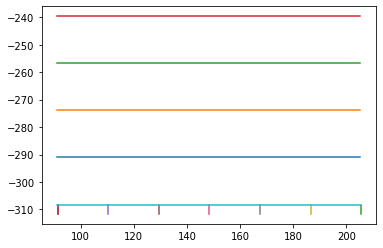

lines[0].y1 = 308.2
lines[1].y1 = 308.2
lines[2].y1 = 308.2
lines[3].y1 = 308.2
lines[4].y1 = 308.2
lines[5].y1 = 308.2
lines[6].y1 = 308.2
lines[7].y1 = 308.2
lines[8].y1 = 308.2
lines[9].y1 = 308.2
lines[10].y1 = 291.06
lines[11].y1 = 273.91
lines[12].y1 = 256.76
lines[13].y1 = 239.61


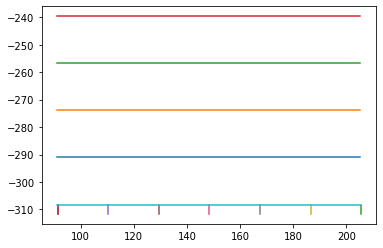

In [38]:
for file in file_list:
    drawing = svg2rlg(f'data/figures/{file.name}')
    lines = get_type(drawing, Line, False)
    for i, line in enumerate(lines):
        print(f'lines[{i}].y1 = {line.y1}')
        plot_line(line)
    plt.show()
    plt.close()
    #line = get_polyline(drawing)
    #print(line)

In [48]:
import pandas as pd
import datetime
from collections import namedtuple

Ref = namedtuple('Reference', ['rate', 'level'])

ref = Ref(-.4, -291.06)
ref

def polyline2df(poliline, baseline, ref, start_date = datetime.date(2020, 2, 16), yname = 'ratio'):
    df = pd.DataFrame()
    factor = ref.rate / (ref.level - baseline)
    
    x, y = [], []
    for i, value in enumerate(poliline.points):
        if i % 2 == 0:
            x.append(start_date)
            start_date = start_date + datetime.timedelta(days=1)
        elif i % 2 == 1:
            y.append(((value * -1) - baseline) * factor)
            
    df['date'] = x
    df[yname] = y
    
    return df.set_index('date')

df = polyline2df(polyline, -273.91, ref)
#df.set_index('x')
df.head()

,ratio
date,
2020-02-16,0.042682
2020-02-17,-0.030787
2020-02-18,-0.026822
2020-02-19,-0.031020
2020-02-20,-0.027522


In [49]:
dataframes = []

for file in file_list:
    drawing = svg2rlg(f'data/figures/{file.name}')
    polyline = get_type(drawing, PolyLine, True)
    data_name = file.name.split('.')[0]
    print(data_name)
    df = polyline2df(polyline, -273.91, ref, yname = data_name)
    dataframes.append(df)

Residential
Grocery & pharmacy
Parks
Retail - recreation
Workplaces
Transit stations


In [54]:
df = pd.concat(dataframes, axis=1)
df.reset_index().to_feather('gcmr.feather')
df.to_csv('gcmr.csv')